In [1]:
import matplotlib.pyplot as plt

import numpy as np
import librosa
from librosa import display
from scipy.io import wavfile

In [2]:
# y, sr = librosa.load("Way.mp3", sr=None, offset=268, duration=30)
y, sr = librosa.load("Lune.mp3", sr=None, offset=158, duration=30)
# y, sr = librosa.load("C2.wav", sr=None)
# C.shape, sr, np.max(C)

In [3]:
k = 3
res = 6
fk = 1
keys = 12
bins_per_octave = keys*k
sr_resampled = sr*res
n_octaves = 9
n_bins = n_octaves*keys*k
hop_length = 256

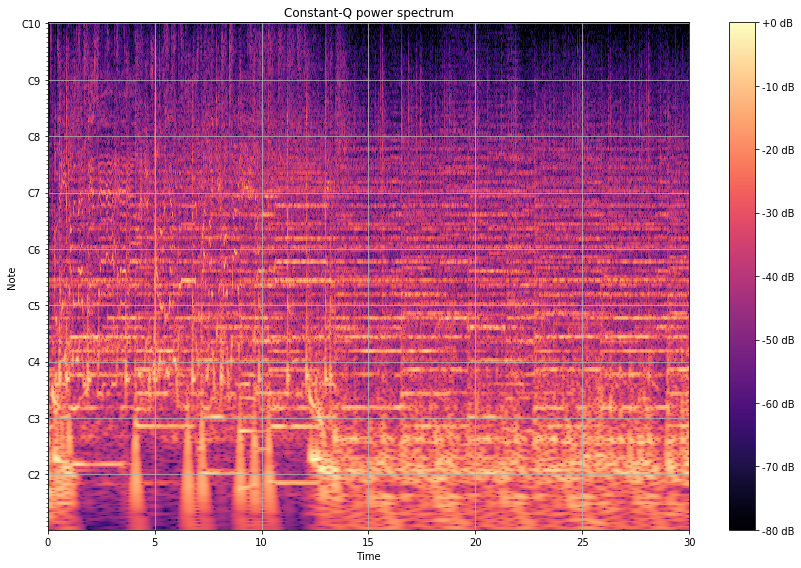

In [4]:
y_resampled = librosa.resample(y, sr, sr_resampled)
y_cqt = librosa.cqt(y_resampled, sr=sr_resampled, bins_per_octave=bins_per_octave, n_bins=n_bins, hop_length=hop_length, filter_scale=1/fk)
y_cqt_abs = np.abs(y_cqt)
plt.figure(figsize=(12, 8))
display.specshow(librosa.amplitude_to_db(y_cqt_abs, ref=np.max), sr=sr_resampled*2, x_axis='time', y_axis='cqt_note', bins_per_octave=bins_per_octave) 

plt.colorbar(format='%+2.0f dB')
plt.grid()
plt.title('Constant-Q power spectrum')
plt.tight_layout()

y_icqt_hat_resampled = librosa.icqt(C=y_cqt, sr=sr_resampled, bins_per_octave=bins_per_octave, hop_length=hop_length, filter_scale=1/fk)

y_icqt_hat = librosa.resample(y_icqt_hat_resampled, sr_resampled, sr)
wavfile.write('file__9.wav', rate=sr, data=y_icqt_hat)

# wavfile.write('file__9.wav', rate=sr*res, data=y_hat)

In [5]:
# k = 1
# res = 22
# y_resampled = librosa.resample(y, sr, sr*res)
# CC = librosa.cqt(y_resampled, sr=sr*res, bins_per_octave=12*k, n_bins=10*12*k, hop_length=512, filter_scale=1/k)
# C = np.abs(CC)
# display.specshow(librosa.amplitude_to_db(C, ref=np.max), sr=sr*res, x_axis='time', y_axis='cqt_note', bins_per_octave=12*k) 
# # cqt_note
# plt.colorbar(format='%+2.0f dB')

# plt.title('Constant-Q power spectrum')
# plt.tight_layout()

# y_hat = librosa.icqt(C=CC, sr=sr*res, bins_per_octave=12*k, hop_length=512, filter_scale=1/k)

# y_hatr = librosa.resample(y_hat, sr*res, sr)
# wavfile.write('file__10.wav', rate=sr, data=y_hatr)

In [6]:
# y.shape, C.shape

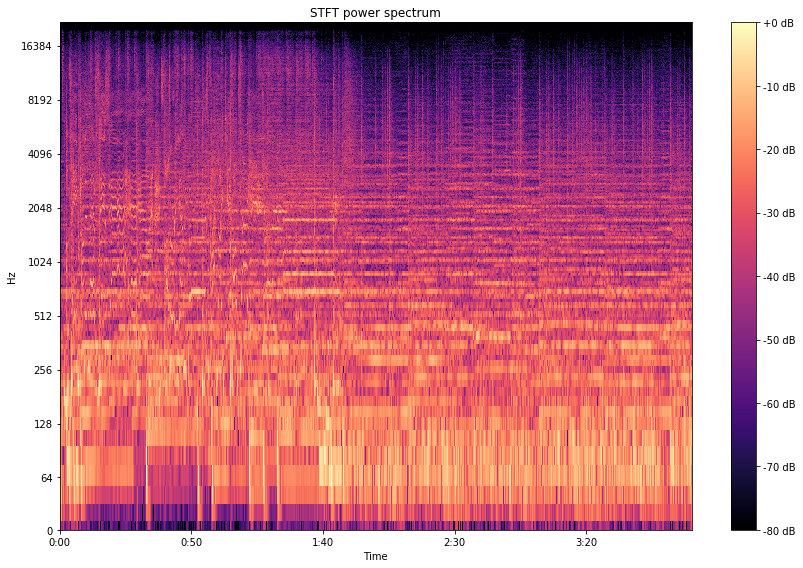

In [7]:
y_stft = librosa.stft(y, hop_length=64, n_fft=2048)
y_stft_abs = np.abs(y_stft)
plt.figure(figsize=(12, 8))
display.specshow(librosa.amplitude_to_db(y_stft_abs, ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('STFT power spectrum')
plt.tight_layout()

y_istft_hat = librosa.istft(y_stft_abs, hop_length=64)
wavfile.write('file__.wav', rate=sr, data=y_istft_hat)

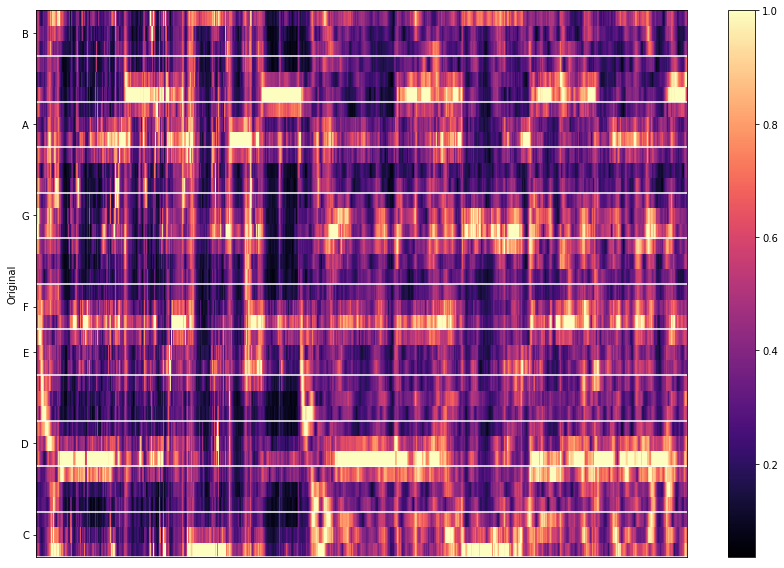

In [8]:
# k = 3
# res = 6
chroma_orig = librosa.feature.chroma_cqt(y=y, sr=sr, bins_per_octave=bins_per_octave, n_chroma=bins_per_octave)
plt.figure(figsize=(12, 8))
librosa.display.specshow(chroma_orig, y_axis='chroma', bins_per_octave=bins_per_octave)
plt.colorbar()
plt.ylabel('Original')
plt.hlines(y=range(12), xmin=0, xmax=3100, color='white')
plt.tight_layout()

In [9]:
k = 3
n_octaves = 9
nkeys = keys*k
permutation = np.array([j + octave*nkeys for j in range(nkeys) for octave in range(n_octaves)])
# permutation

In [10]:
y_cqt_abs_perm = y_cqt_abs[permutation,:]
y_cqt_abs_perm.shape

(324, 31008)

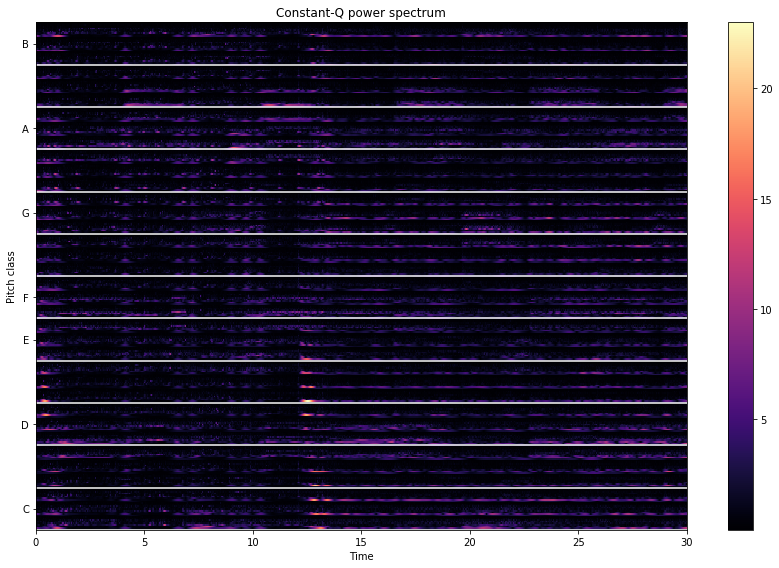

In [11]:
# res = 6
plt.figure(figsize=(12, 8))
display.specshow(np.power(y_cqt_abs_perm, 1/1.2), sr=sr_resampled*2, x_axis='time', y_axis='chroma', bins_per_octave=bins_per_octave*9) 
# cqt_note
plt.colorbar()
# plt.grid()
plt.hlines(y=range(12), xmin=0, xmax=30, color='white')
# plt.axhline(y=[1,2], xmin=0, xmax=3)
plt.title('Constant-Q power spectrum')
plt.tight_layout()

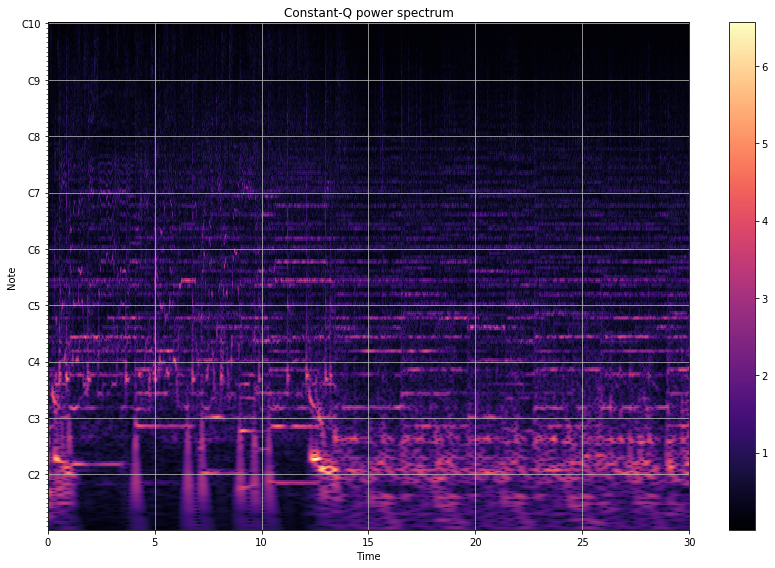

In [12]:
plt.figure(figsize=(12, 8))
display.specshow(np.power(y_cqt_abs, 1/2), sr=sr_resampled*2, x_axis='time', y_axis='cqt_note', bins_per_octave=bins_per_octave)
plt.colorbar()
plt.grid()
plt.title('Constant-Q power spectrum')
plt.tight_layout()

In [13]:
import sklearn.decomposition
T = sklearn.decomposition.MiniBatchDictionaryLearning(n_components=64)
scomps, sacts = librosa.decompose.decompose(y_stft_abs, transformer=T, sort=True)

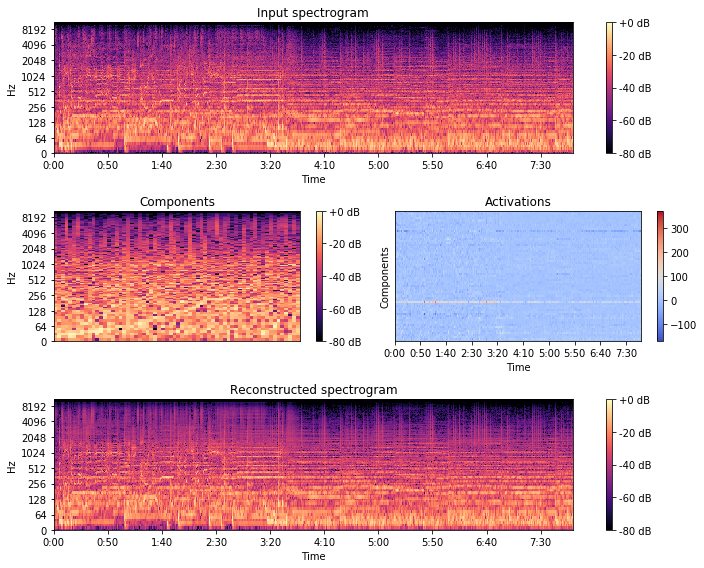

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(y_stft_abs, ref=np.max), y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 2, 3)
librosa.display.specshow(librosa.amplitude_to_db(scomps, ref=np.max), y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')
plt.subplot(3, 2, 4)
librosa.display.specshow(sacts, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()
plt.subplot(3, 1, 3)
S_approx = scomps.dot(sacts)
librosa.display.specshow(librosa.amplitude_to_db(S_approx, ref=np.max), y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()

In [15]:
T2 = sklearn.decomposition.MiniBatchDictionaryLearning(n_components=64)
mag, phase = librosa.magphase(y_cqt)
phase_abs = np.angle(phase)
scomps2, sacts2 = librosa.decompose.decompose(phase_abs, transformer=T2, sort=True)

In [16]:
np.angle(phase[10,0:10])
# y_stft[10,0:10]
# mag[10,0:10]

array([1.66587234e-04, 2.41512311e-01, 4.82861648e-01, 7.24174514e-01,
       9.65484501e-01, 1.20684949e+00, 1.44818268e+00, 1.68948158e+00,
       1.93082796e+00, 2.17216869e+00])

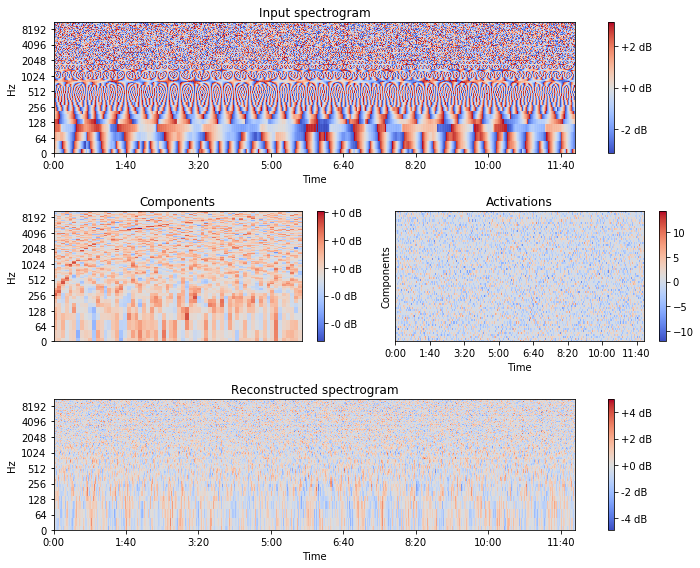

In [17]:
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
librosa.display.specshow(phase_abs, y_axis='log', x_axis='time')
plt.title('Input spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.subplot(3, 2, 3)
librosa.display.specshow(scomps2, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Components')
plt.subplot(3, 2, 4)
librosa.display.specshow(sacts2, x_axis='time')
plt.ylabel('Components')
plt.title('Activations')
plt.colorbar()
plt.subplot(3, 1, 3)
S_approx2 = scomps2.dot(sacts2)
librosa.display.specshow(S_approx2, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Reconstructed spectrogram')
plt.tight_layout()


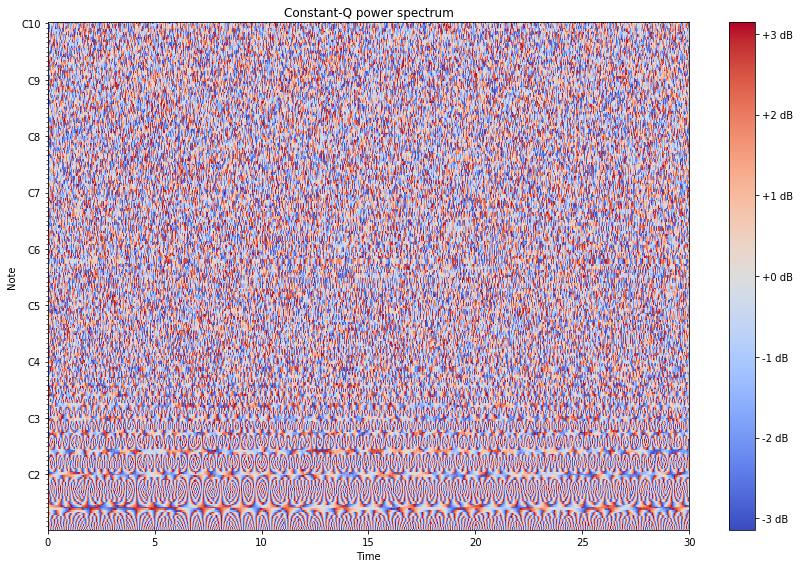

In [18]:
plt.figure(figsize=(12, 8))
display.specshow(phase_abs, sr=sr_resampled*2, x_axis='time', y_axis='cqt_note', bins_per_octave=bins_per_octave) 

plt.colorbar(format='%+2.0f dB')
# plt.grid()

plt.title('Constant-Q power spectrum')
plt.tight_layout()